# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The smartcab stays at the same position during the simulation. Not very smart!

The smartcab is receiving a haphazard set of rewards, where a given reward is repeated about twenty times, then a new rewards is applied based on the color of the light. 

When the light is green, the smartcab receives a negative reward (often around -5). When the light is red though, the smartcab receives a slight positive reward. The color of the light seems to change between trials in a relatively random manner. 

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

num_dummies: Increasing this flag effectively increases the amount of traffic within the environment. Clearly, increasing num_dummies will lead to more opportunities for crashes. Additionally, once the smartcab learns how to drive properly (according to traffic laws), increasing num_dummies will lead to more waiting time for the smartcab. Therefore, increasing num_dummies would likely lead to a decline in safety and reliability. 

Grid_size: this flag effectively determines how large the environment is. It's easiest to explain the effects of the flag through an example: If we doubled these dimensions, it would be more difficult for the smartcab to arrive on time (since it must travel a longer distance. Additionally though, it might decrease the likelihood that there is traffic at each intersection (since there are more stoplights). 

n_test: This is simply the number of testing trials that our smartcab will perform following the training period. By increasing this, say from 10 to 100, we can ensure that our results were not influenced to heavily by random chance. That said, changing n_test has no effect on the training simulation period. 

Within the environment.py file and within the enivornment class (which contains and defines nearly all of the function in the document), the definition "act" is called to perform an action. Specifically, the necessary and sufficient information it needs is the state, action, and agent. 

Render() refers to the program creating graphical visualizations, such as displaying where the smartcab is within the environment. On the other hand, Render_text() explains where the smartcab is with text, such as "Agent properly idled at a red light".

Within the planner.py file, the definition for next_waypoint specifies the order of operations that our smartcab will take. The file indicates that the smartcab will first consider East-West (line 38) before checking North-South (line 58). 


-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


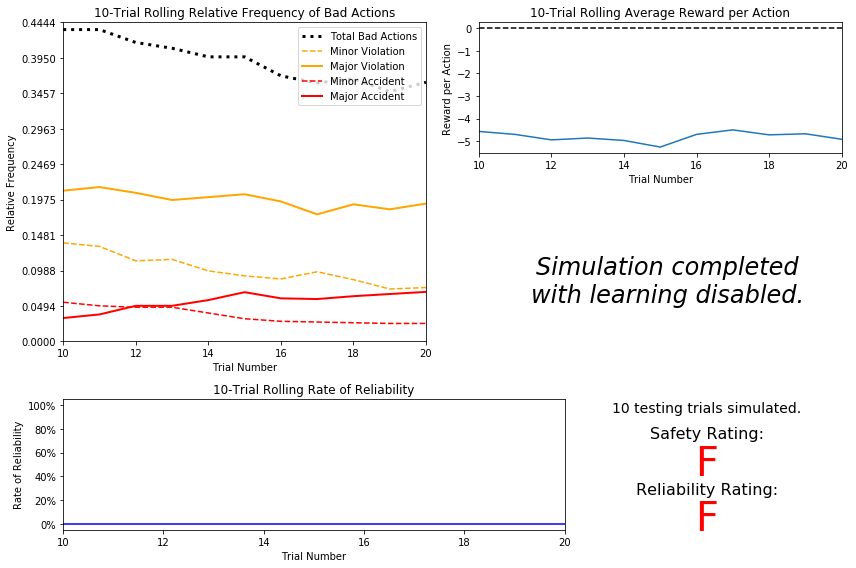

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

The graph in the top left corner shows that between 35% - 45% of all actions during the training period were considered "bad" (as indicated by the black-dotted line). In total, approximately 10-15% of actions resulted in accidents (as indicated by adding together the red lines). 

The rate of reliability makes complete sense: driving randomly essentially implies that the smartcab isn't leveraging what its learning, so we shouldn't expect it to be reliable! 

In summation, the average reward that an agent receives is negative. The rolling average of rewards (seen in the graph in the top right corner) suggests that the smartcab has been penalized heavily for bad decisions. 

The results don't change dramatically over time. The evidence is that the 10-trial rolling average of rewards does not appear to have a positive slope (top right) and the overall number of accidents only declines slightly (less than 10%). 

The two failing grades given to the (not very smart) smartcab imply that the smartcab is neither safe nor reliable! The smartcab had at least one major accident (it's very unsafe) and failed to reach its destination on time over 60% of the time (it's very unreliable).



-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

In considering the features important for safety, its important to first describe how traffic laws will effect the policy of our driving agent. For instance, consider our smartcab arriving at a red light. If the light is red and the waypoint is red, we might expect our optimal policy to be a right-hand turn, especially if there were no other cars on the road. But imagine that the left-hand car is traveling straight (to our right). For this example, the 'left' feature is essential, because it will directly change our optimal policy. In a similar matter, imagine that we have a green light, and that our waypoint is left. The direction of travel of the oncoming car will clearly affect our optimal policy: if the oncoming car is going straight, then we idle. Otherwise, the optimal policy is to turn left.

Contrary to these scenarios for 'left' and 'oncoming', the intended direction of the 'right' car is irrelevant in determining our optimal policy. For instance, if we have a green light, the 'right' car always has a red light. If we intend to turn right on a red light, the travel path of the 'right' will never in and of itself lead to a crash. Therefore, because 'right' doesn't affect our optimal policy (it's unnecessary), it is removed from the information. 

For safety, we are most concerned about the obstacles in the smartcab's way that may lead to car crashes. Specifically, the color of the 'light' variable is going to be the most important and relevant feature for learning safety. Without learning the color of the light, there's no context for learning what the other cars will do during a given situation! For instance: imagine our waypoint is straight. The optimal policy of our smartcab is entirely dependent on the traffic light: if the light is green, we should expect the smartcab to move forward. If the light is red, we should expect it to stop. Without knowing the color of the light, the smartcab would cause many accidents (as evidenced in the initial 'no-learning.csv).

In the context of decision trees, we might imagine that the highest-level feature to learn is the color of the light. Specifically, inputs.light would be the first node, which has "green" and "red" arrows leading down the decsision tree. All future policies will be dependent on the color of the light. From a macro-perspective, we can consider that if the smartcab never learned the difference between green and red lights, they would crash more frequently than if they never learned about the intended travel direction of the cars at the traffic light. 

We can rationalize why 'deadline' should be emitted as a relevant feature by exploring its relationship with the optimal policy. Put simply, there is no situation or state in which the knowledge of deadline will improve our optimal policy. Unlike waypoint, the data regarding 'deadline' is basically irrelevant in determining which actions optimize efficiency. Additionally, this data has no effect on safety (unlike 'light', 'left', and 'upcoming'), because it in no way helps or modifies how the smartcab will navigate through traffic. Basically, deadline is an irrelevant feature with regards to maximizing safety and efficiency, another way of stating that omitting 'deadline' does not lead to information loss. Our smartcab will learn the optimal policy, regardless of the input for deadline. For these reasons, we don't include deadline. 

We can also imagine a potential flaw: if we included deadline, the number of states would increase dramatically, because we would be multiplying the 96 states (calculated prior) by all potential deadline states. The reason this leads to a flaw is because our smartcab would have to effectively learn the optimal policy for thousands of states, rather than 96. In turn, this would make it much more difficult for our smartcab to learn the optimal policy. 

For the disucssion of efficiency, waypoint is likely the most influential feature, particularly because it is the only variable which indicates whether a given action brings the smartcab objectively closer to the destination. Since speed is not being considered within this environment, waypoint contains all the informtion needed to efficiently arrive at our destination. To exemplify its impact, we can imagine one extreme in which no waypoint was given: the smartcab might learn all the traffic laws described above, and even learn to become an extremely safe vehicle, simply by idling the entire time. Of course, this would entail complete inefficiency. When waypoint is included though, our smartcab can learn to consider potential actions and receive rewards that encourage maximizing efficiency. In summary, waypoint is the only variable that our smartcab need to learn how to maximize efficiency.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

To calculate the total number of states, we can calculate the number of total combinations that can be created by multiplying the four 'state' variables. To recap, these variables are: light, waypoint, oncoming, and left. In this case, deadline is not included as a characteristic of the state. 

The color of the light is a discrete variable taking on two possible inputs: green or red. 

"Waypoint" indicates the direction of the goal, relative to the smartcab's current "heading". Therefore, it will never be optimal to idle infinitely (only would occur if it had reached its intended destination), and it seems. Therefore, there are three potential states for waypoint: left, right, straight.

For each variable "left" , "right", and "oncoming", the variables can take on four possible inputs, relative to its position: 
1) The car turns left
2) The car turns right
3) The car drives straight
4) No movement: There is no car, or the car idles. 


Therefore, we can calculate the total number of states with the following equation: 
2 ('light' colors) * 3 ('waypoint' directions) * 4 (actions that 'oncoming' car could take) * 4 (actions that 'left' car could take) . This implies that there are 96 potential states, which seems to be very reasonable. 





### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

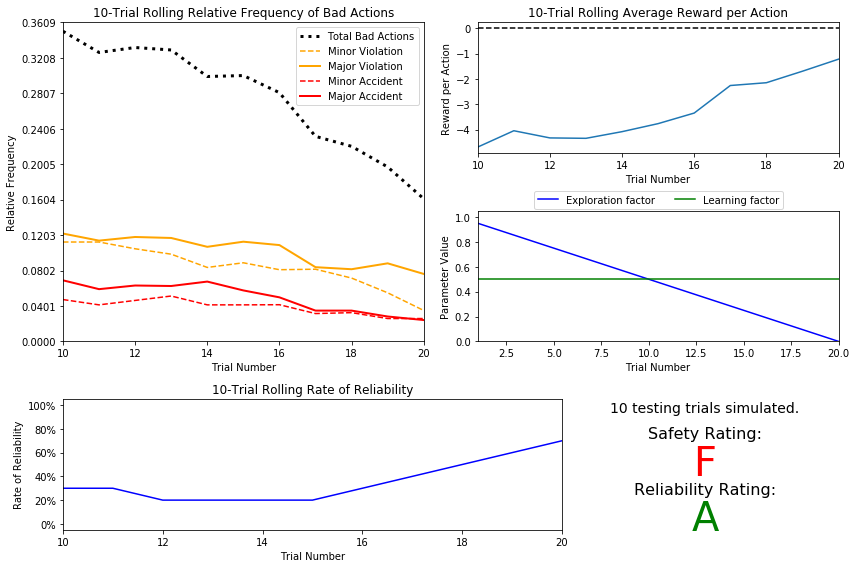

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

One interesting similarity is that even though the Q-learning agent clearly has fewer overall bad actions, the categorical ranking of bad actions is similar. In both the Q-learning and basic driving examples, violations (both minor and major) occured more frequently than accidents (both minor and major).

Both the 10-trial rolling rate of reliability graph (bottom left corner), and the 10-trial rolling average reward (top right corner) seem to level off near trial number 18. This makes sense, as we can compare the epsilon value at each trial number (graph middle right). by the time n=18, epsilon equals .1, since we set it to decay by .05 at each time step. In summary, leveling off near n=18 makes sense given the epsilon tolerance.

The decaying function was set to Et = Et+1 -.05. This can also be expressed as Et=1-.05(t-1), since we began with an initial value of epsilon=1. This rewritten expression is a linear function with negative slope (m=-.05). The blue line in the graph display this exact linear equation, so the decaying function is accurately represented. 

The number of bad actions decreased as the number of trials increased. As we should expect, as the number of bad actions decreased, rewards subsequently increased, as displayed by the graph in top left corner. 

Overall: the reliability has improved dramatically (from F to A), but safety is still of concern (remaining at F). That said, the frequency of accidents for the default Q-learning agent did decline, relative to the initial driving agent.

In summary: the use of the function "if random.random() < self.epsilon" helped our Q-learning algorithm manage the tradeoff between exploration and exploitation. The reward per action clearly increased at a steady rate (top right graph), whereas it had remained effectively flat for the initial 'default learning' attempt. 





-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

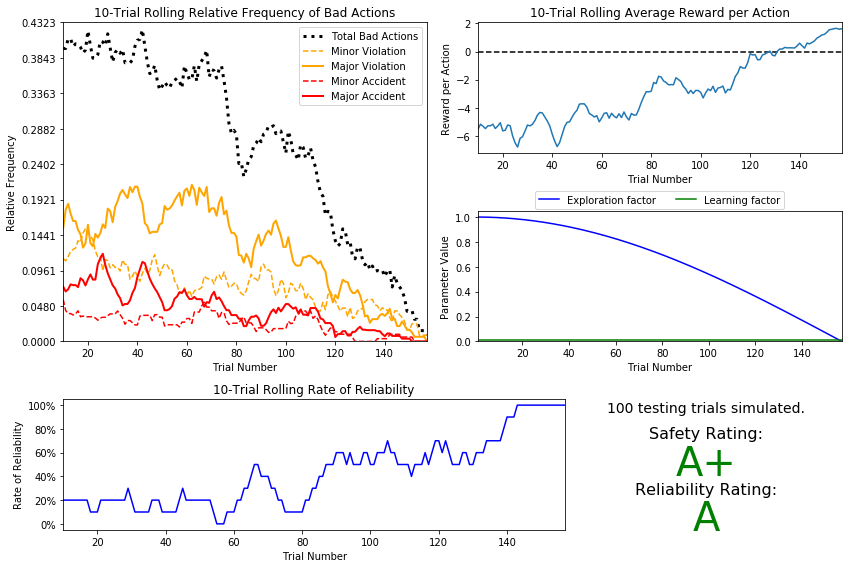

In [6]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

Of the four functions above, I found that the the last equation (that incorporated cosine) was the most effective. I used a random seed to compare the reliability ratings that occured as a result of the functions, holding all other variables constant. The function with epsilon = \cos(at) at first had a reliability rating of B, whereas the reliability ratings for the other equations were as follows: 1/t^2 = F, alpha^t = F, e^-alpha*t = F. I've commented out the other equations (within the "reset" function). Note that an absolute value was used, since the function suggested 0<a<1

Approximately 155 to 160 trials were needed before testing. 

I tried several learning rates (commented out in the code) and found that a low learning rate of alpha=.01 was the best, as it provided a balance of high reliability and safety performance. Because I was not concerned about having many trials, a low learning rate steadily and slowly improved the Q-learner. I used an epsilon tolerance of .001, because it essentially required the learning algorithm to be "more sure of itself" before moving onto the testing phase. The efficacy of these methods was confirmed by the A+ score for safety as well as the A score for reliability. 

The improvement is very profound. One metric that indicates a clear improvement is the reward per action: for the improved Q-learner, reward per action is postive by the end of the training period, whereas it was negative for the default learner. Additionally, the rolling rate of reliability hits 100% for the optimized Q-learner, whereas it remained below 80% for the default learner. Finally, the total percentage of bad actions reaches near 0% by the end of the optimized Q-learners trial period, whereas it was still above 15% for the default Q-learner.

In qualitative terms terms, the difference between the default and the improved Q-learner is the difference between a car that is actually safe for the roads vs. a car that still requires a better algorithm. Of all the adjustments I made, I believe the most important improvement was the choice of epsilon function. Most importantly: even though some of the measurements remained haphhazard (such as reinforcement score and ratio of bad actions), the two primary metrics were the safety and reliability ratings, with safety being improved dramatically.  

The results imply that a successful and appropriate policy was learned! The high degree of exploration during the training phase likely aided this. 

I'm satisfied: A's all around. 


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:**

In all cases, we can consider the smartcab considering three primary cases, and essentially following a decision tree based on the following variables: the color of the light, the waypoint (optimal) direction, and the traffic at the light. 
If the smartcab is at a green light, then the smartcab considers the waypoint. If the waypoint is left, then the smartcab considers whether a car is straight ahead. If there is a car present, and if that car is driving right or driving straight, then the smartcab's optimal policy is to wait. If the car is driving left as well, or if there is no car directly across from the smartcab, the optimal policy is to turn left. When the light is green and the waypoint is straight or right, then the smartcab's optimal policy is to drive in the direction of the waypoint.

If the smartcab is at a red light, they must then consider the waypoint. If the waypoint is left or straight, then the optimal policy is to stop at the red light. However if the light is red and the waypoint is to the right, the smartcab considers the actions of the other cars at the light (the traffic). If there is another vehicle who 1) has a green light and 2) intends to drive to the smartcab's right, then the smartcab must wait at the light. Alternatively, the smartcab should turn right if no other vehicle intends to both 1) drive to the smartcab's right and 2) has a green light. 

When the there was a green light, and the waypoint was forward, the suggested policy was to turn right, as evidenced by the "right turn" having the highest reinforcement value (.04 vs. .02). This state is different than the optimal policy we might expect, because the recommended direction of travel (right) was not the same as the waypoint (forward). 

Some of the best examples that the Q-learning algorithm found the optimal policy is that at each red light, the choices "straight" and "right" are often associated with severe negative penalties. 
Consider the format: [waypoint, light, oncoming, left]

In both of the following cases it's clear that stopping at the red light is optimal:

forward red left forward 
-- forward : -0.80
-- right : -0.99
-- None : 0.02
-- left : -1.18

left red left left
-- forward : -0.69
-- right : 0.01
-- None : 0.08
-- left : -0.69

The smartcab also managed to learn the best course of action for this more complex scenario:

right red forward right
-- forward : 0.00
-- right : 0.06
-- None : 0.01
-- left : -0.20

On the other hand, we can consider an example of the smartcab learning a policy that was not optimal.
Consider: 

forward green forward forward
-- forward : 0.02
-- right : 0.04
-- None : -0.10
-- left : 0.00

For this example, the smartcab's destination waypoint was forwards, but the Q-value for right was greater, suggesting the smartcab should turn right. The optimal policy in this situation would have implied that the Q-score for 'forward' be larger than the Q-score for 'right'. Since right (.04) was larger than forward (.02), the smartcab did not learn the optimal policy. This error may have occurred because the smartcab didn't confront this situation very often. Additionally, this may have occurred because we did not train our smartcab on a large enough number of trials.


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.